# Generate figures for the p63 MPRA paper Figure 2

In [1]:
#import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statannotations.Annotator import Annotator
import os
from scipy import stats
import numpy as np
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10},
			  font='arial')
#import key tables
os.chdir(r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\tables')
fig_out_path = r'Z:\gbaniulyte\MPRA\AM_STARRSeq\final_scripts_fastq\figures'
df = pd.read_csv('p63enh_starrseq_normCounts_matched_MCF10A_WTp53KO_5variants.csv', index_col=0)
df.sample(5)

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53
53214,chr18_37641930_37641954,flankShuffle,MCF10A,0.614994,Unchanged,8,primary,+,Unique p63RE,51.666667,NaN
8231,chr19_18934982_18935001,WT,MCF10A,1.233408,Unchanged,10,primary,+,p53RE+p63RE,47.899160,5.0
63027,chr19_38296652_38296666,fullShuffle,MCF10A,0.536948,Repressing,10,secondary,-,p53RE+p63RE,48.333333,NaN
116474,chr17_29791509_29791528,flankShuffle,MCF10A p53KO,0.212695,Unchanged,11,secondary,+,Unique p63RE,36.974790,NaN
13591,chr9_28736141_28736155,WT,MCF10A,1.565387,Activating,8,secondary,+,p53RE+p63RE,40.833333,NaN


# Figure 2.
- Correlation between p63 ChIP enrichment in MCF10A and MPRA activity
- Correlation between p63 ChIP enrichment in MCF10A and p63 binding observations
- Correlation between p63 binding observations and MPRA activity
- Enhancer activity of unique vs co-binding, WT and mut with total enhancer numbers as x-labels?
- Correlation between p53 ChIP enrichment in MCF10A and MPRA activity (co-binding only)
- Unique p63 observations and enhacner activity
- Western blot
- Cobinding enhancer activity in WT and KO and WT mut
- Unique vs co-binding activity in p53KO

In [2]:
#fig 2A need ths table that has MCF10A p63 ChIP-seq enrichment data
p63_chip = pd.read_csv('mcf10a_p53p63chromatin_enrichment_for_mpra.csv', usecols=['enhancer_variant', 'p63_log', 'p53_log','name'])
p63_chip.rename(columns={'name':'loc', 'p63_log':'p63_enh_log2','p53_log':'p53_enh_log2'}, inplace=True)
p63_chip.drop_duplicates(inplace=True)
p63_chip

,enhancer_variant,loc,p63_enh_log2,p53_enh_log2
0,WT,chr1_3717092_3717116,13.846449,12.348500
1,WT,chr1_31575754_31575773,12.185185,11.095341
2,WT,chr1_38117813_38117832,12.909385,12.264083
3,WT,chr1_40886808_40886827,12.320982,12.454119
4,WT,chr1_42941183_42941207,12.745322,10.852982
...,...,...,...,...
26901,mut,chr9_132993510_132993534,9.077259,9.499791
26902,mut,chr9_135016437_135016456,9.918657,9.752199
26903,mut,chr9_136533879_136533893,9.009022,9.870974
26904,mut,chr9_137062571_137062595,11.124912,10.585593


In [3]:
p63_enrh = df[df.cell_line == 'MCF10A'].merge(p63_chip, how='left', on=['loc','enhancer_variant'])
p63_enrh

,loc,enhancer_variant,cell_line,RNA/DNA,activity,obs_score,p63RE_class,strand,p63RE_type,gc,obs_p53,p63_enh_log2,p53_enh_log2
0,chr1_3717092_3717116,WT,MCF10A,0.704075,Unchanged,20,primary,+,Unique p63RE,48.333333,NaN,13.846449,12.348500
1,chr1_31575754_31575773,WT,MCF10A,1.586092,Unchanged,20,secondary,-,Unique p63RE,62.184874,NaN,12.185185,11.095341
2,chr1_38117813_38117832,WT,MCF10A,1.681971,Activating,20,primary,+,p53RE+p63RE,57.983193,11.0,12.909385,12.264083
3,chr1_40886808_40886827,WT,MCF10A,2.157630,Activating,20,primary,+,p53RE+p63RE,54.621849,16.0,12.320982,12.454119
4,chr1_42941183_42941207,WT,MCF10A,1.995754,Activating,20,primary,+,Unique p63RE,53.333333,10.0,12.745322,10.852982
...,...,...,...,...,...,...,...,...,...,...,...,...,...
68475,chr9_132993510_132993534,fullShuffle,MCF10A,0.984747,Unchanged,8,primary,+,Unique p63RE,41.666667,NaN,NaN,NaN
68476,chr9_135016437_135016456,fullShuffle,MCF10A,1.171991,Unchanged,8,primary,+,p53RE+p63RE,49.579832,6.0,NaN,NaN
68477,chr9_136533879_136533893,fullShuffle,MCF10A,1.082508,Unchanged,8,senary,-,Unique p63RE,59.166667,NaN,NaN,NaN
68478,chr9_137062571_137062595,fullShuffle,MCF10A,1.087673,Repressing,8,primary,-,Unique p63RE,55.833333,NaN,NaN,NaN


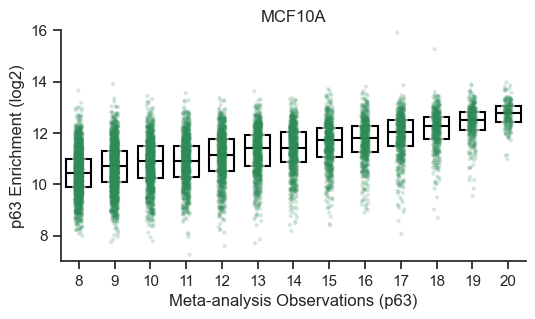

In [37]:
p63_enrh_wt = p63_enrh[p63_enrh.enhancer_variant == 'WT']
fig2A, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=p63_enrh_wt, x='obs_score', y='p63_enh_log2', order = sorted(p63_enrh_wt.obs_score.unique()),
			showfliers = False,color='white',whis=False, width=0.7, ax=ax, boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(data=p63_enrh_wt, x='obs_score', y='p63_enh_log2',color="seagreen", order = sorted(p63_enrh_wt.obs_score.unique()),ax=ax,
			  alpha=0.2, size=3).set(xlabel = 'Meta-analysis Observations (p63)', title='MCF10A',ylabel='p63 Enrichment (log2)',ylim=(7,16))
fig2A.savefig(os.path.join(fig_out_path,'2A_20240506.pdf'), dpi=300, transparent=True, bbox_inches='tight')

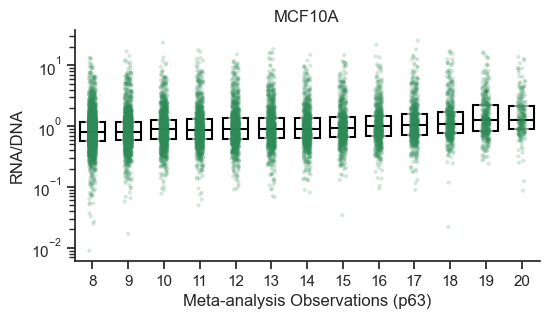

In [38]:
#Figure 2B.
df_p63_wt = df[(df.cell_line == 'MCF10A') & (df.enhancer_variant == 'WT')]
fig2B, ax = plt.subplots(figsize=(6,3))
sns.boxplot(data=df_p63_wt, x='obs_score', y='RNA/DNA', order = sorted(df_p63_wt.obs_score.unique()),
			showfliers = False,color='white',whis=False, width=0.7, ax=ax, boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(x='obs_score', y='RNA/DNA', data=df_p63_wt, color="seagreen", order = sorted(df_p63_wt.obs_score.unique()),ax=ax,
			  alpha=0.2, size=3).set(yscale='log',xlabel = 'Meta-analysis Observations (p63)', title='MCF10A')
fig2B.savefig(os.path.join(fig_out_path,'2B_20240506.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [39]:
add spearman's correlation to fig 2C
spear_wt = stats.spearmanr(p63_enrh[p63_enrh.enhancer_variant == 'WT']['RNA/DNA'], p63_enrh[p63_enrh.enhancer_variant == 'WT']['p63_enh_log2'], nan_policy='omit')
spear_mut = stats.spearmanr(p63_enrh[p63_enrh.enhancer_variant == 'mut']['RNA/DNA'], p63_enrh[p63_enrh.enhancer_variant == 'mut']['p63_enh_log2'], nan_policy='omit')
print(spear_wt,spear_mut)

SignificanceResult(statistic=0.12700127453895502, pvalue=2.2583606768096133e-48) SignificanceResult(statistic=-0.000226774220770699, pvalue=0.9792648031913904)


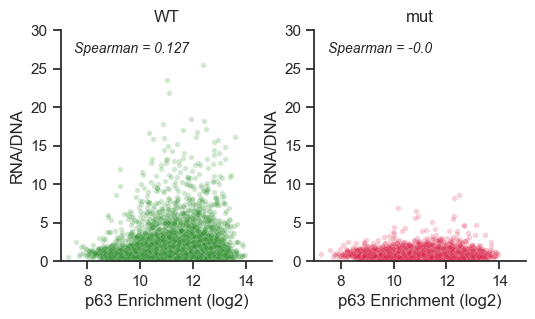

In [51]:
fig2C, (ax,ax1) = plt.subplots(1,2,figsize=(6,3))
sns.scatterplot(data=p63_enrh[p63_enrh.enhancer_variant == 'WT'], x='p63_enh_log2', y='RNA/DNA',ax=ax, color = 'forestgreen',alpha=0.2,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p63 Enrichment (log2)', title='WT')
sns.scatterplot(data=p63_enrh[p63_enrh.enhancer_variant == 'mut'], x='p63_enh_log2', y='RNA/DNA',ax=ax1, color = 'crimson',alpha=0.2,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p63 Enrichment (log2)', title='mut')
ax.text(7.5, 27, 'Spearman = ' + str(round(spear_wt.correlation, ndigits=3)), style='italic')
ax1.text(7.5, 27, 'Spearman = ' + str(round(spear_mut.correlation, ndigits=3)), style='italic')
fig2C.savefig(os.path.join(fig_out_path,'2C_20240430.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

p53RE+p63RE_WT vs. p53RE+p63RE_mut: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=2.568e+06
Unique p63RE_WT vs. Unique p63RE_mut: Wilcoxon test (paired samples), P_val:3.907e-52 Stat=1.057e+07


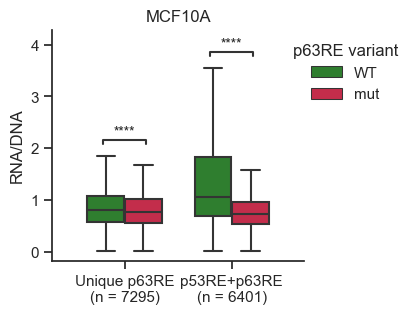

In [52]:

df_long_mcf = df[(df.cell_line == 'MCF10A') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
fig2D, ax = plt.subplots(figsize=(3.25,3))
# sns.set_context(rc={"xtick.labelsize":10})
cols = {'WT':'forestgreen', 'mut':'crimson'}
compare = [[('Unique p63RE', 'WT'),('Unique p63RE', 'mut')], [('p53RE+p63RE','WT'),('p53RE+p63RE','mut')]]
sns.boxplot(data = df_long_mcf, x = 'p63RE_type',y = 'RNA/DNA',hue = 'enhancer_variant', width=0.7, palette = cols, showfliers = False, ax=ax).set(xlabel=None,title='MCF10A')
annotator = Annotator(pairs = compare, data = df_long_mcf, x = 'p63RE_type', y = 'RNA/DNA', hue = 'enhancer_variant', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9, 1))
ax.set_xticklabels(['Unique p63RE\n(n = ' + str(df_long_mcf[df_long_mcf.p63RE_type == 'Unique p63RE']['loc'].nunique()) + ')',
					'p53RE+p63RE\n(n = ' + str(df_long_mcf[df_long_mcf.p63RE_type == 'p53RE+p63RE']['loc'].nunique()) + ')'])
fig2D.savefig(os.path.join(fig_out_path,'2D_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

C:\Users\gaban\AppData\Local\Temp\ipykernel_2680\708110859.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mcf_wt['obs_bin_p53'] = df_mcf_wt.obs_p53.apply(lambda x: bins(x))


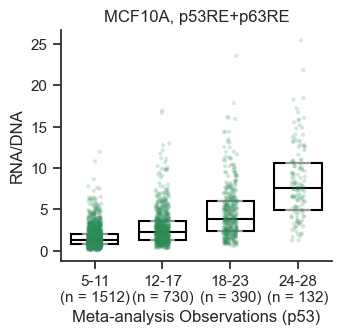

In [6]:
def bins(number):
	bin_range = {'5-11':list(range(5,12)), '12-17':list(range(12,18)),
	'18-23':list(range(18,24)), '24-28':list(range(24,29))}
	for k,v in bin_range.items():
		if number in v:
			return k
			break
x_order=['5-11','12-17', '18-23','24-28']
# sns.set_context(rc={"xtick.labelsize":12})
df_mcf_wt = df[(df.enhancer_variant == 'WT') & (df.cell_line == 'MCF10A') & (df.p63RE_type == 'p53RE+p63RE') & (~df.obs_p53.isna())]
df_mcf_wt['obs_bin_p53'] = df_mcf_wt.obs_p53.apply(lambda x: bins(x))
fig2E, ax = plt.subplots(figsize=(3.5,3))
sns.boxplot(data = df_mcf_wt, x = 'obs_bin_p53',y = 'RNA/DNA', order=x_order, width=0.7, color = 'white', whis=False,ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'}, showfliers = False)
sns.stripplot(x='obs_bin_p53', y='RNA/DNA', data=df_mcf_wt, order=x_order, color = "seagreen",ax = ax,
			  alpha=0.2, size=3).set(xlabel = 'Meta-analysis Observations (p53)', title='MCF10A, p53RE+p63RE')
# compare = [('24-28', '18-23'), ('18-23', '12-17'),('12-17','5-11')]
# annotator = Annotator(pairs = compare, data = df_mcf_wt, x = 'obs_bin_p53',y = 'RNA/DNA', order=x_order, ax = ax)
# annotator.configure(test = "Mann-Whitney").apply_and_annotate()
counts = df_mcf_wt.value_counts(subset='obs_bin_p53').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in x_order], size = 11)
fig2E.savefig(os.path.join(fig_out_path,'2E_20240506.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [55]:
#add spearman's correalation to fig 2F
spear_wt = stats.spearmanr(p63_enrh[p63_enrh.enhancer_variant == 'WT']['RNA/DNA'], p63_enrh[p63_enrh.enhancer_variant == 'WT']['p53_enh_log2'], nan_policy='omit')
spear_mut = stats.spearmanr(p63_enrh[p63_enrh.enhancer_variant == 'mut']['RNA/DNA'], p63_enrh[p63_enrh.enhancer_variant == 'mut']['p53_enh_log2'], nan_policy='omit')
print(spear_wt,spear_mut)

SignificanceResult(statistic=0.4045128465795685, pvalue=0.0) SignificanceResult(statistic=0.09383202704176942, pvalue=4.377991963582205e-27)


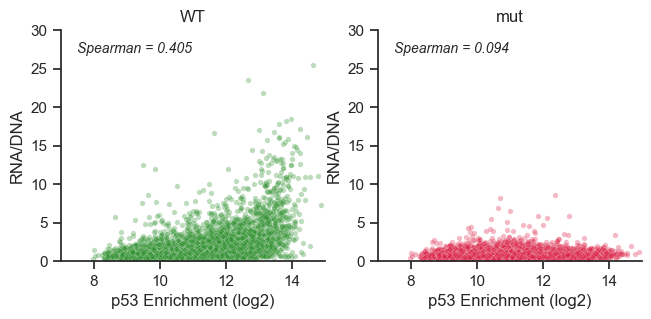

In [59]:
fig2F, (ax,ax1) = plt.subplots(1,2,figsize=(7.5,3))
sns.scatterplot(data=p63_enrh[p63_enrh.enhancer_variant == 'WT'], x='p53_enh_log2', y='RNA/DNA',ax=ax, color = 'forestgreen',alpha=0.3,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p53 Enrichment (log2)', title='WT')
sns.scatterplot(data=p63_enrh[p63_enrh.enhancer_variant == 'mut'], x='p53_enh_log2', y='RNA/DNA',ax=ax1, color = 'crimson',alpha=0.3,s=15).set(xlim=(7,15), ylim=(0,30), xlabel='p53 Enrichment (log2)', title='mut')
ax.text(7.5, 27, 'Spearman = ' + str(round(spear_wt.correlation, ndigits=3)), style='italic')
ax1.text(7.5, 27, 'Spearman = ' + str(round(spear_mut.correlation, ndigits=3)), style='italic')
fig2F.savefig(os.path.join(fig_out_path,'2F_20240506.pdf'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

WT_MCF10A vs. WT_MCF10A p53KO: Wilcoxon test (paired samples), P_val:5.112e-143 Stat=6.480e+06
WT_MCF10A p53KO vs. mut_MCF10A p53KO: Wilcoxon test (paired samples), P_val:0.000e+00 Stat=4.145e+06


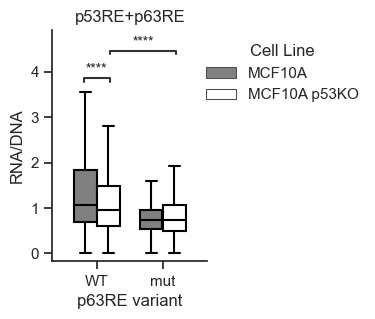

In [58]:
df_mcf_pko_both = df[(df.p63RE_type == 'p53RE+p63RE') & ((df.enhancer_variant == 'WT') | (df.enhancer_variant == 'mut'))]
cols = {'MCF10A':'grey', 'MCF10A p53KO':'white'}
compare = [[('WT', 'MCF10A p53KO'),('mut', 'MCF10A p53KO')],
			[('WT', 'MCF10A'),('WT', 'MCF10A p53KO')]]
fig2G, ax = plt.subplots(figsize=(2,3))
sns.boxplot(data = df_mcf_pko_both, x = 'enhancer_variant',y = 'RNA/DNA', hue='cell_line', width=0.7, palette=cols, showfliers = False, ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'}, whiskerprops={'color':'black'}, capprops={'color':'black'}).set( xlabel='p63RE variant', title = 'p53RE+p63RE')
annotator = Annotator(pairs = compare, data = df_mcf_pko_both, x = 'enhancer_variant',y = 'RNA/DNA', hue='cell_line', ax=ax)
annotator.configure(test = "Wilcoxon").apply_and_annotate()
ax.legend(frameon = False, title = 'Cell Line')
sns.move_legend(ax, "upper left", bbox_to_anchor=(0.9, 1))
fig2G.savefig(os.path.join(fig_out_path,'2G_20240506.eps'), dpi=300, transparent=True, bbox_inches='tight')

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Unique p63RE vs. p53RE+p63RE: Mann-Whitney-Wilcoxon test two-sided, P_val:1.840e-17 U_stat=2.138e+07


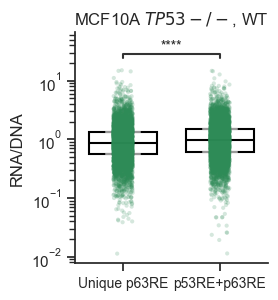

In [2]:
df_pko = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
compare = [('p53RE+p63RE', 'Unique p63RE')]
sns.set_context(rc={"xtick.labelsize":10})
fig2I, ax = plt.subplots(figsize=(2.5,3))
sns.boxplot(data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', width=0.7, color='white', showfliers = False, whis=False, ax = ax,
			boxprops={'edgecolor':'black'}, medianprops={'color':'black'}, meanprops={'color':'black'})
sns.stripplot(data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', color = "seagreen",ax = ax,
			  alpha=0.2, size=3).set( yscale='log',xlabel=None, title='MCF10A '+ '$\it{TP53}-/-$'+', WT')
annotator = Annotator(pairs = compare, data = df_pko, x = 'p63RE_type',y = 'RNA/DNA', ax=ax)
annotator.configure(test = "Mann-Whitney").apply_and_annotate()
fig2I.savefig(os.path.join(fig_out_path,'2I_20240508.pdf'), dpi=300, transparent=True, bbox_inches='tight')